## Final Project 3 - Ensamble Model

Kelompok 5:

- Kevin Anggara Putra
- Daniel Leksono
- Ines Savitri

## A. Perkenalan
### Cardiovascular Diseases (CVDs)

Cardiovascular diseases (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

### Data yang digunakan

Dataset yang digunakan berasal dari kaggle dataset https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data,  yang berisi 299 baris dan 3 kolom. 
Data tersebut berisi kumpulan fitur yang digunakan untuk memprediksi kematian akibat gagal jantung.

## Project Overview

Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.

### Attribute Information
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up


## Variable Information
Dari dataset di atas, dapat kita tentukam variable yang akan dianalisis :
- Varibel independen yang digunakan adalah age, anaemia, creatinine_phosphokinase, diabetes, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, and time.
- Variabel dependen yang digunakan adalah DEATH_EVENT.

## B. Import pustaka

In [6]:
import pandas as pd
import numpy as np 
import missingno as msn

from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

## C. Data Loading

In [7]:
# Download datasets
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
# Mengetahui jumlah data dan kolom
df.shape

(299, 13)

In [9]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
# Mengetahui nilai unik |data column
for col in df.columns :
  print(col, 'Unique Value')
  print(df[col].unique())
  print('-'*100)

age Unique Value
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
----------------------------------------------------------------------------------------------------
anaemia Unique Value
[0 1]
----------------------------------------------------------------------------------------------------
creatinine_phosphokinase Unique Value
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   

## D. Data Cleaning

In [12]:
# Mengetahui missing value pada setiap baris dan kolom
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Cleansing data dengan standar missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dapat terlihat bahwa dataset yang digunakan tidak memiliki missing value.

In [14]:
# Mengetahui apakah terdapat duplikasi data dalam dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

In [15]:
df.duplicated().sum()

0

Dapat terlihat bahwa pada dataset yang digunakan tidak terdapat duplikasi data.

## E. Explorasi Data

In [16]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [17]:
# Mengetahui korelasi antar kolom
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot: title={'center': 'Correlation of Heart Failure Prediction'}>

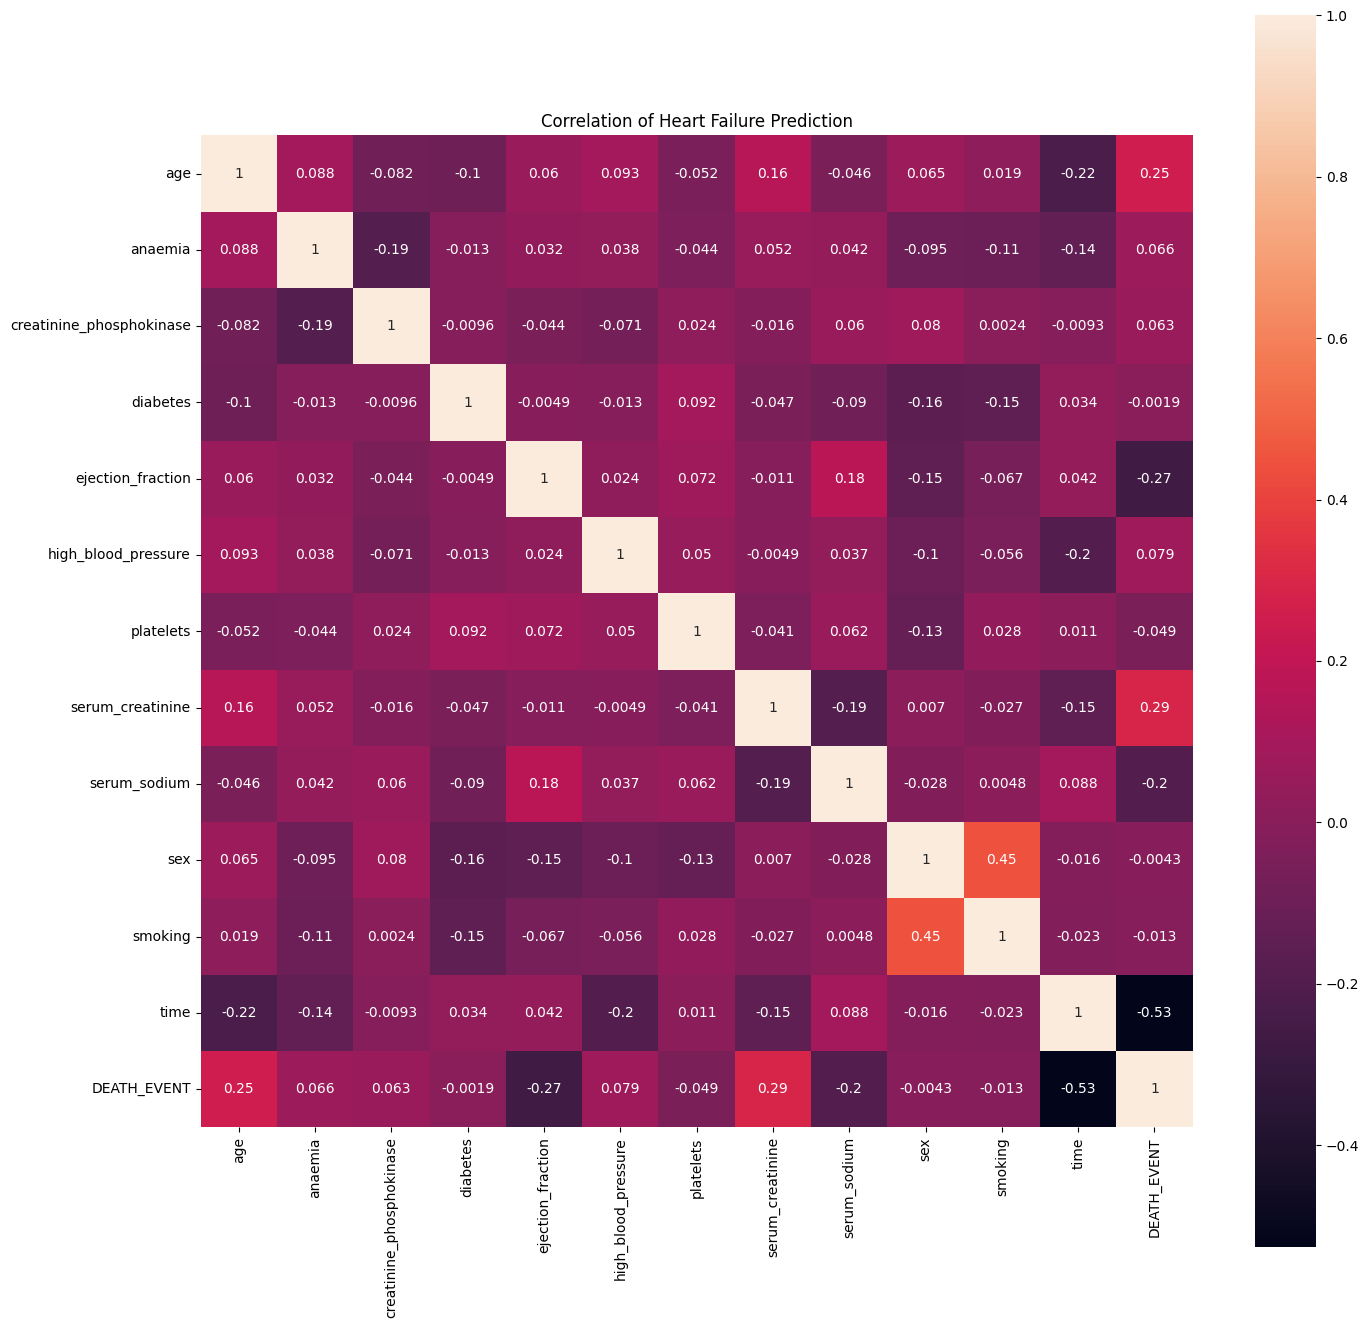

In [18]:
# Melihat korelasi data
fig, ax = plt.subplots()
plt.title('Correlation of Heart Failure Prediction')
fig.set_size_inches((16,16))
sns.heatmap(df.corr(), square=True, annot=True)

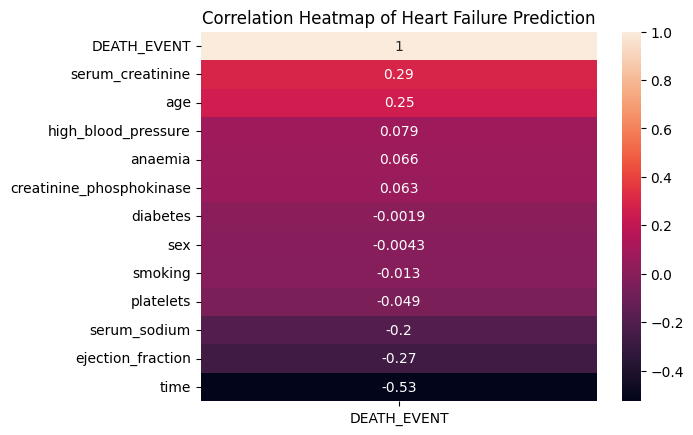

In [19]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Dari data di atas dapat diketahui bahwa:
- Rata-rata variabel "DEATH_EVENT", adalah 0,32, menunjukkan bahwa 32 persen pengamatan dalam kumpulan data memiliki DEATH_EVENT sama dengan 1. Oleh karena itu akurasi baseline adalah 68 persen dan model yang dibangun harus lebih tinggi dari 68 persen.
- Dataset ini memiliki tingkat ketidakseimbangan kelas yang ringan sehingga akurasi saja tidak cukup untuk menentukan kinerja model.
- Fitur creatine_phosphokinase dan trombosit memiliki variasi yang sangat besar dibandingkan dengan fitur lainnya.
- Usia berkisar antara 40 hingga 95 dengan rata-rata 60. Jadi dataset condong ke populasi yang lebih tua.
- Rata-rata variabel jenis kelamin adalah 0,65 yang menunjukkan bahwa variabel tersebut condong ke arah laki-laki (jenis kelamin=1)

### Numeric and Categoric

Tahap ini akan membagi data menjadi data kategori dan data numeric, yang berguna untuk visualisasi data.

In [21]:
# Numerical Fitur 
# Tipe data yang berisi angka atau bilangan
num_col = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [22]:
# Categorical Fitur
# Tipe data yang hanya memiliki dua nilai, yaitu 0 dan 1
cat_col = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

### Distribusi Data Numeric

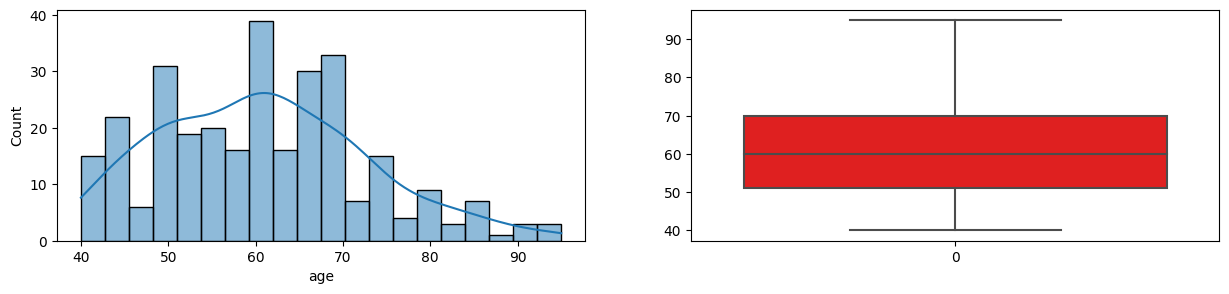

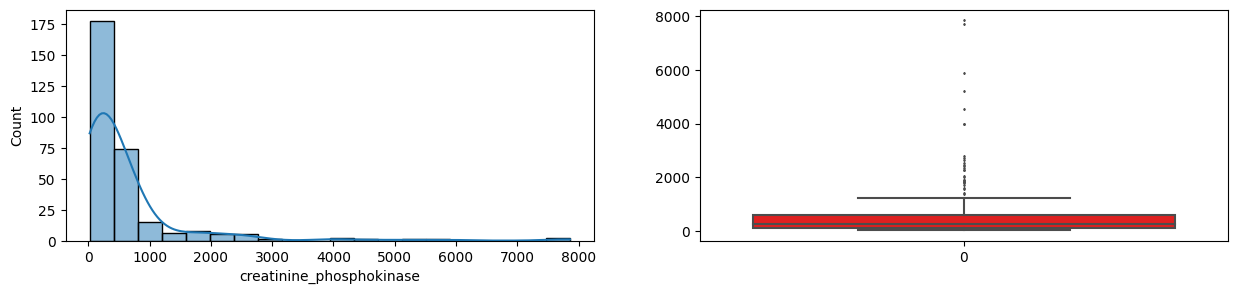

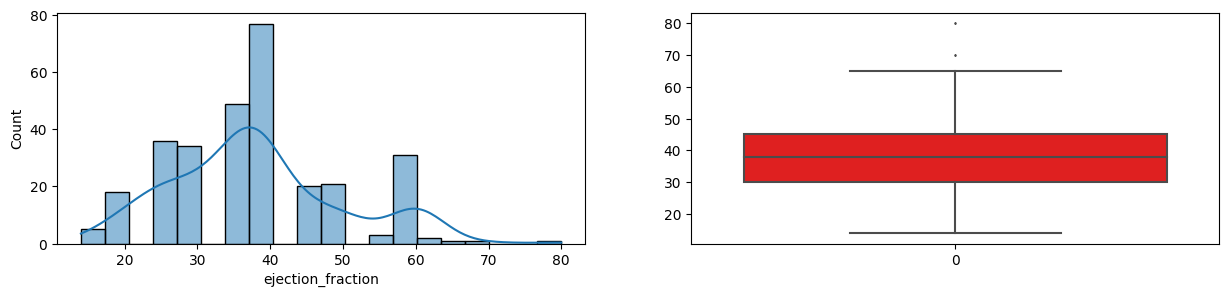

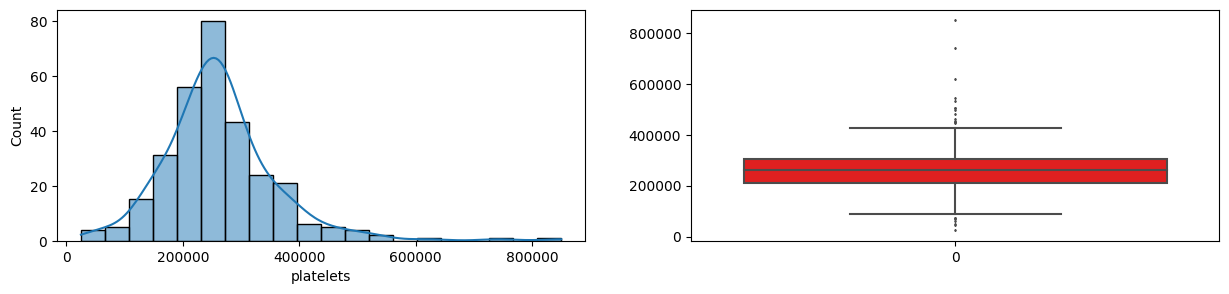

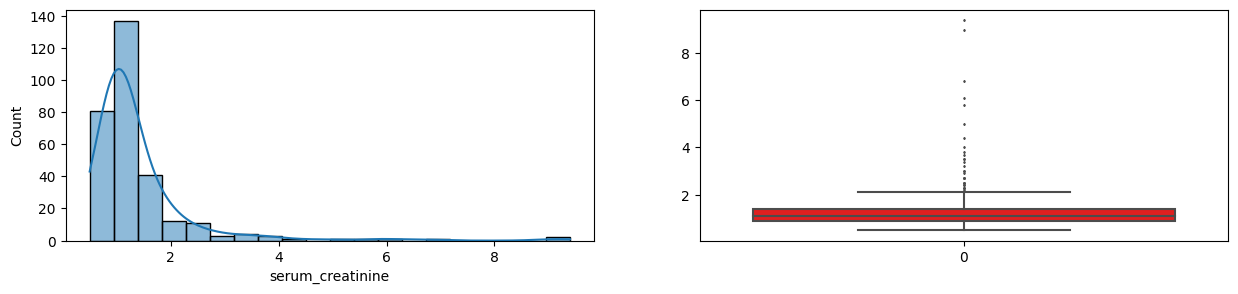

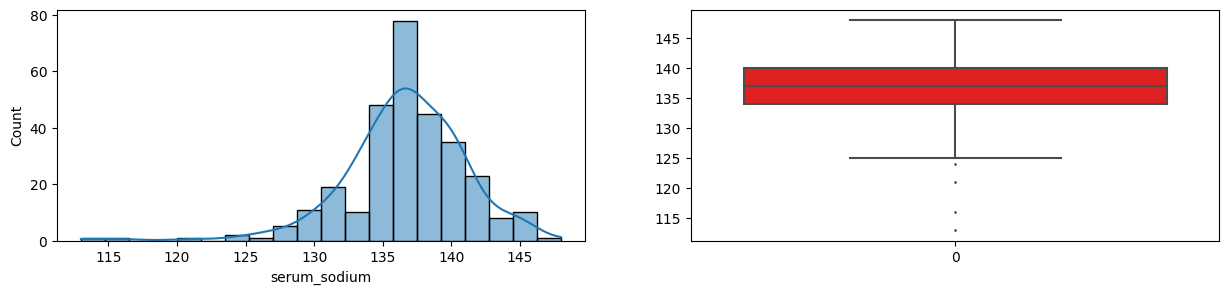

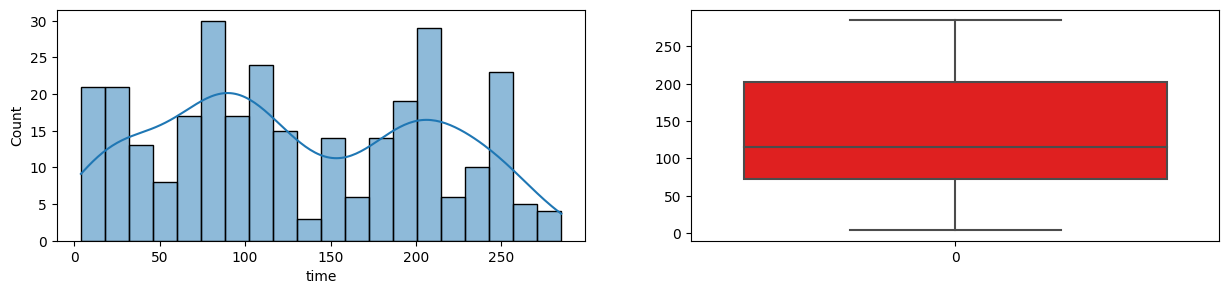

In [23]:
# Distribusi Numerical Fitur
for i in num_col:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    
    sns.histplot(df[i], bins=20, kde=True, ax=axs[0]);
    sns.boxplot(df[i], ax=axs[1], color='red', fliersize=1);

Dari output di atas, dapat kita ketahui bahwa hampir semua variabel memiliki outliers, maka akan dilakukan "handling outliers" agar persebaran data lebih baik.

In [24]:
# Handling Outliers
num_col_outliers = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for feature in num_col_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit, feature] = lower_limit
    df.loc[df[feature]>upper_limit, feature] = upper_limit

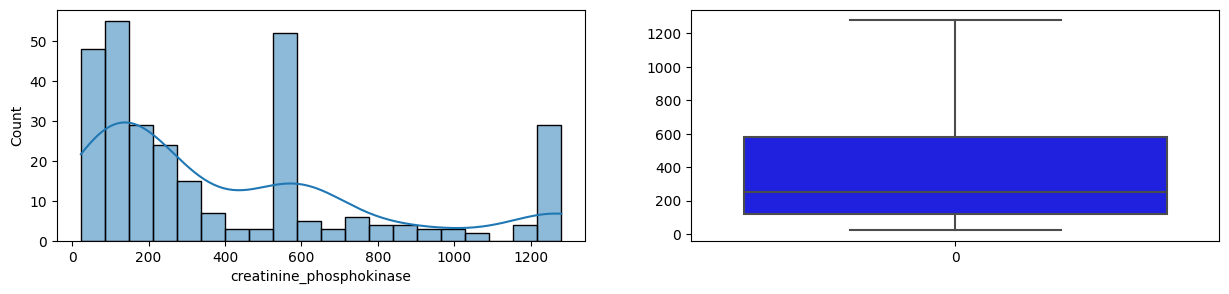

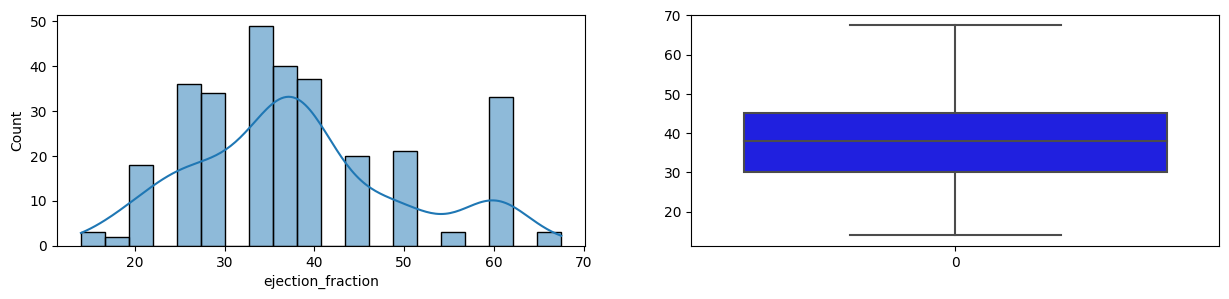

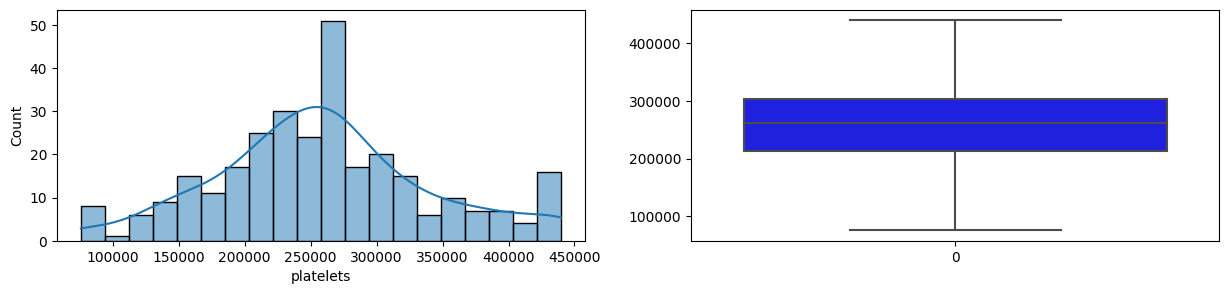

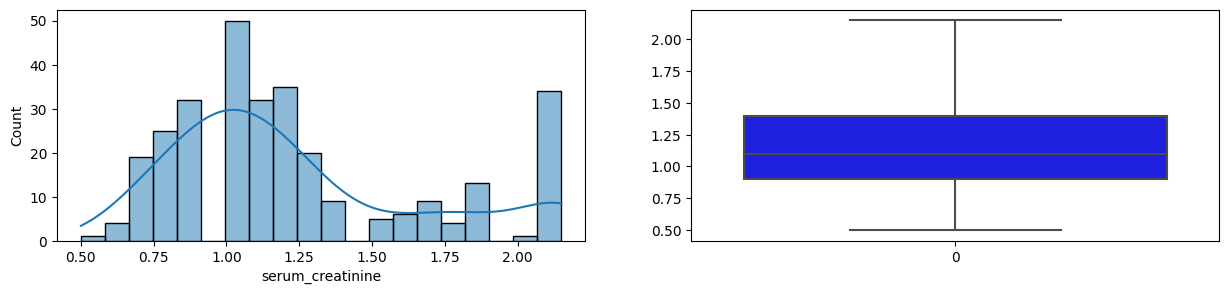

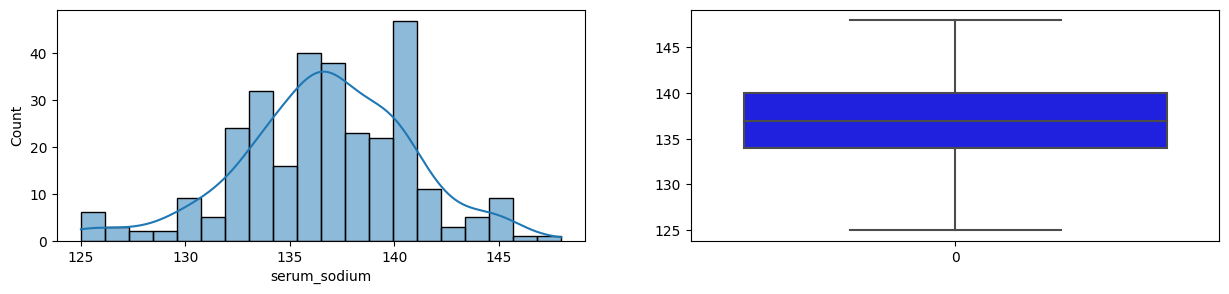

In [25]:
num_col = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for i in num_col:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    
    sns.histplot(df[i], bins=20, kde=True, ax=axs[0]);
    sns.boxplot(df[i], ax=axs[1], color='blue', fliersize=1);

Dari output di atas, dapat kita ketahui bahwa sudah tidak ada outliers dan data sudah memiliki persebaran yang baik.

### Distribusi data Categori

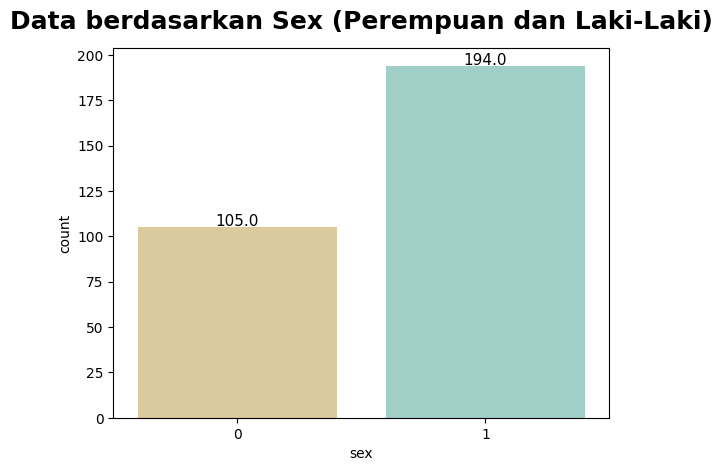

In [26]:
# Kolom Sex

ax = sns.countplot(x="sex",data = df, palette='BrBG');
ax.set_title("Data berdasarkan Sex (Perempuan dan Laki-Laki)", y=1.03, fontsize=18, fontweight="bold")
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

Note : 
(0) adalah Perempuan
(1) adalah Laki-Laki

Dari output di atas, dapat kita ketahui terdapat 105 Pasien Perempuan dan 194 Pasien Laki-Laki. Berarti 65% adalah Laki-Laki. Ada data gender yang lebih condong seperti yang biasanya kita perkirakan perincian antara gender seharusnya mendekati 50/50.

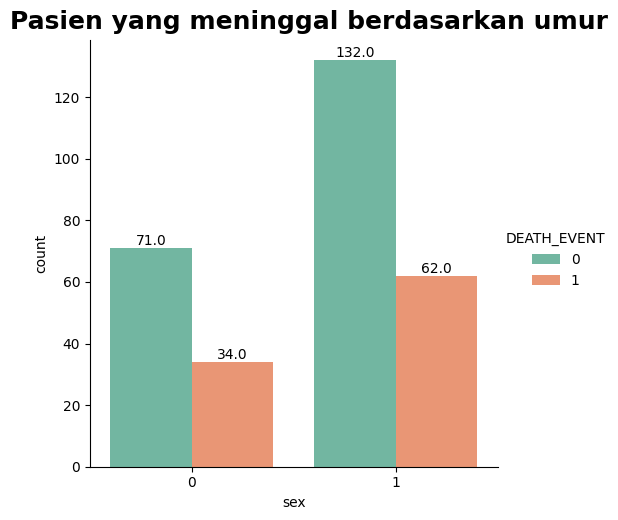

In [27]:
# Berapa banyak pasien yang meninggal berdasarkan umur?

g = sns.catplot(x="sex", kind="count", hue="DEATH_EVENT", data= df, palette="Set2")
g.fig.suptitle("Pasien yang meninggal berdasarkan umur", y=1.03, fontsize=18, fontweight="bold")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [v.get_height() for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Dari output di atas, dapat kita ketahui bahwa
- 196 laki-laki, 62 (31,6%) meninggal.
- 105 perempuan, 34 (32,4%) meninggal.
Secara keseluruhan, dari 299 pasien, 96 (32%) meninggal.

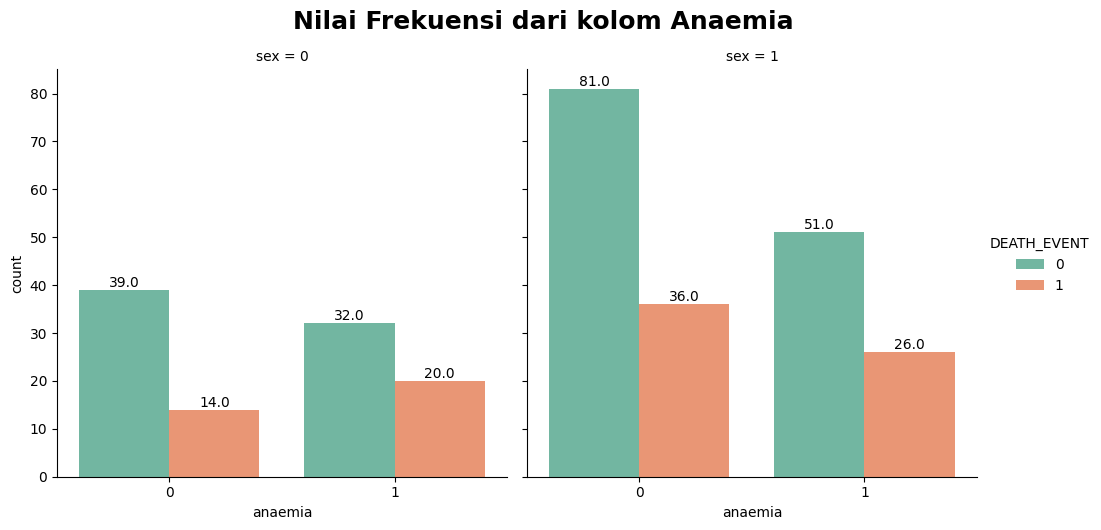

In [28]:
# Kolom Anaemia

g = sns.catplot(x="anaemia",  kind="count", hue= "DEATH_EVENT", col = "sex", data = df, palette="Set2");
g.fig.suptitle("Nilai Frekuensi dari kolom Anaemia", y=1.05, fontsize=18, fontweight="bold")


for ax in g.axes.ravel():

    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Dari output di atas, dapat kita ketahui bahwa 
1. Hampir setengah dari perempuan menderita anemia.
    - 13% perempuan yang meninggal tidak menderita anemia.
    - 19% perempuan yang meninggal menderita anemia.
2. 40% laki-laki mengalami anemia.
    - 19% laki-laki yang meninggal tidak menderita anemia.
    - 13% laki-laki yang meninggal menderita anemia.
Tampaknya anemia bukan merupakan faktor risiko utama terutama pada pria.

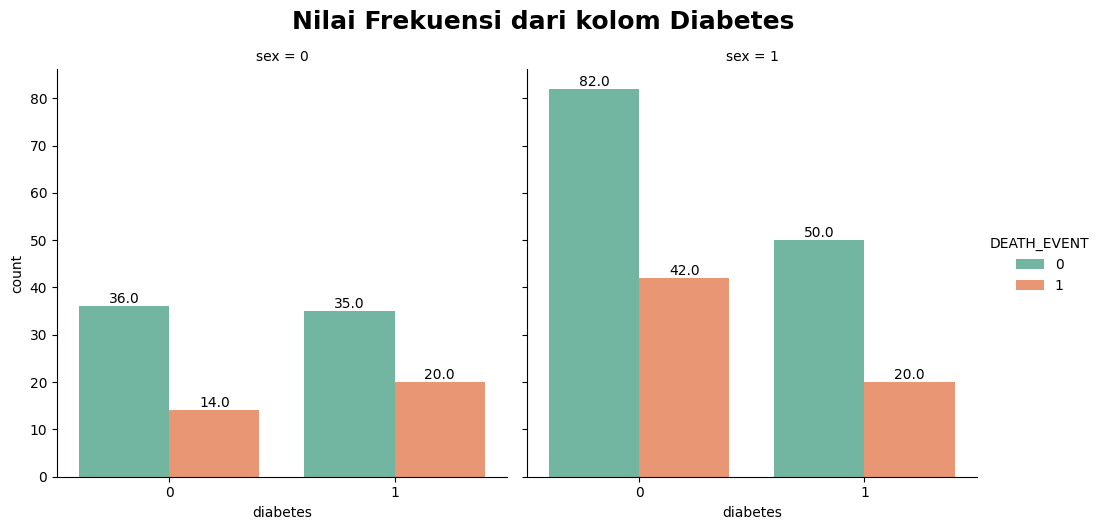

In [29]:
# Kolom Diabetes

g = sns.catplot(x="diabetes",  kind="count", hue= "DEATH_EVENT", col = "sex", data = df, palette="Set2");
g.fig.suptitle("Nilai Frekuensi dari kolom Diabetes", y=1.05, fontsize=18, fontweight="bold")


for ax in g.axes.ravel():

    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Dari output di atas dapat kita ketahui bahwa: 
1. 52% perempuan menderita diabetes.
    - 19% perempuan dengan diabetes meninggal.
    - 13% perempuan tanpa diabetes meninggal.
2. 36% laki-laki menderita diabetes.
    - 10% laki-laki dengan diabetes meninggal.
    - 22% laki-laki tanpa diabetes meninggal.
Diabetes tampaknya bukan penyebab utama kematian di antara para pasien.

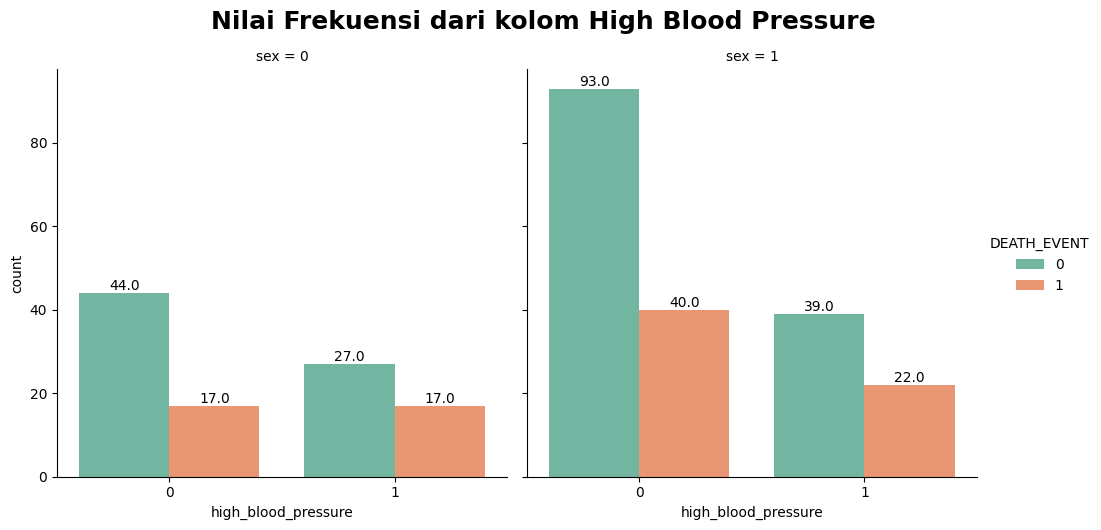

In [30]:
# Kolom High Blood Pressure

g = sns.catplot(x="high_blood_pressure",  kind="count", hue= "DEATH_EVENT", col = "sex", data = df, palette="Set2");
g.fig.suptitle("Nilai Frekuensi dari kolom High Blood Pressure", y=1.05, fontsize=18, fontweight="bold")


for ax in g.axes.ravel():

    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Dari output di atas, dapat kita ketahui bahwa:
1. 42% perempuan memiliki tekanan darah tinggi.
    - 16% perempuan dengan tekanan darah tinggi meninggal.
    - 16% perempuan tanpa tekanan darah tinggi meninggal.
2. 31% laki-laki memiliki tekanan darah tinggi.
    - 11% laki-laki dengan tekanan darah tinggi meninggal.
    - 21% laki-laki tanpa tekanan darah tinggi meninggal.
Tekanan darah tinggi saja bukanlah faktor risiko utama.

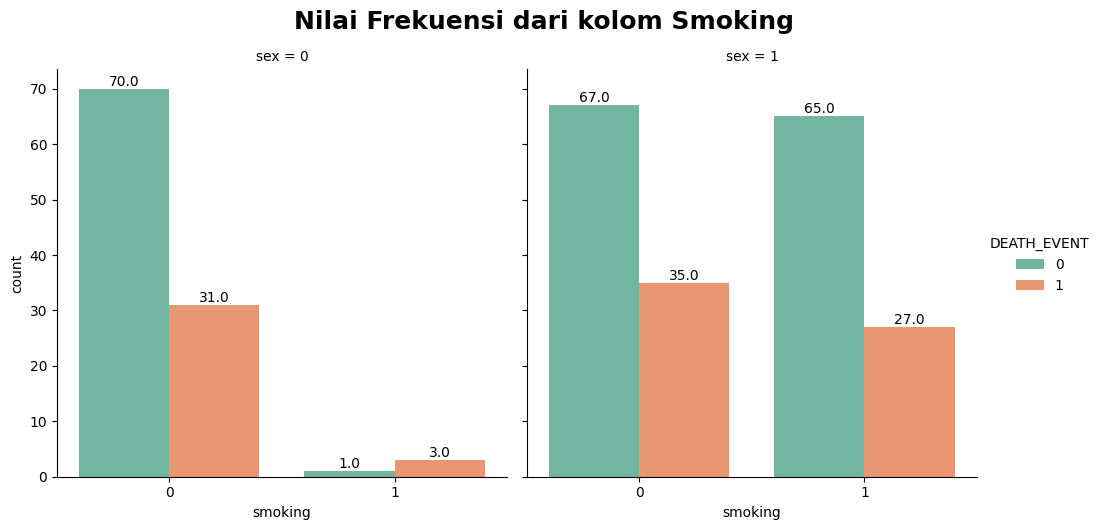

In [31]:
# Kolom Smoking

g = sns.catplot(x="smoking",  kind="count", hue= "DEATH_EVENT", col = "sex", data = df, palette="Set2");
g.fig.suptitle("Nilai Frekuensi dari kolom Smoking", y=1.05, fontsize=18, fontweight="bold")


for ax in g.axes.ravel():

    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Dari Output di atas, dapat kita ketahui bahwa:
1. Merokok populer di kalangan pria dibandingkan dengan wanita: 0,04% wanita merokok.
    - 3 dari 4 perokok pada wanita meninggal.
    - 30% wanita bukan perokok meninggal.
2. 47% pria merokok.
    - 14% perokok pria meninggal.
    - 18% pria bukan perokok meninggal.
Setidaknya berdasarkan data laki-laki, merokok tampaknya tidak menjadi faktor risiko utama.

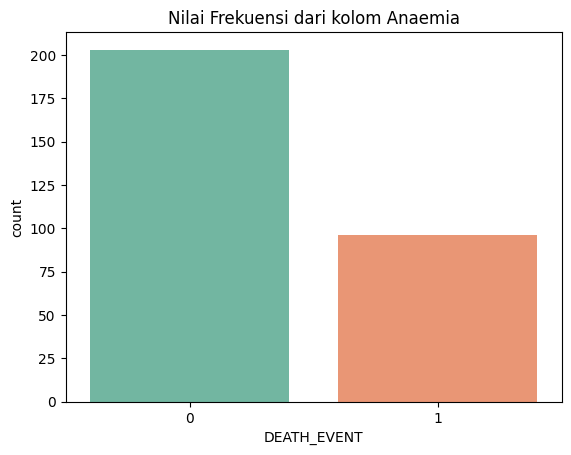

In [32]:
# Kolom DEATH EVENT

sns.countplot(x = 'DEATH_EVENT', data = df, palette = "Set2")
plt.title('Nilai Frekuensi dari kolom Anaemia')
plt.show()

Dari output di atas, dapat terlihat bahwa kolom DEATH_EVENT menunjukkan data yang imbalance. Imbalance adalah suatu keadaan dimana distribusi kelas data tidak seimbang, jumlah kelas data (instance) lebih sedikit atau lebih banyak dari data kelas lainnya. Maka perlu dilakukan teknik penyeimbangan data.

## F. Data Preprocessing

In [33]:
data = df.copy()

### Split Dataset

In [34]:
from sklearn.model_selection import train_test_split

x = data.drop(['DEATH_EVENT'], axis = 1)
y = data['DEATH_EVENT']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Standard Scaler 

In [36]:
scaler = StandardScaler()
scaler.fit(x_train, y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

### Handling Imbalanced

Pada kolom DEATH_EVENT menunjukkan bahwa terdapat data yang imbalance, maka perlu dilakukan teknik penyeimbang dataset, sebagai berikut :

- SMOTE
- Bordeline SMOTE
- ADASYN

Parameter K_Neighbors akan diatur menjadi 8 neighbors untuk setiap teknik.

### SMOTE

In [38]:
smote = SMOTE(k_neighbors=8)

In [39]:
x_train_smote, y_train_smote, = smote.fit_resample(x_train.astype('float'), y_train)

In [40]:
from collections import Counter

In [41]:
print('Before SMOTE : ', Counter(y_train))
print('After SMOTE : ', Counter(y_train_smote))

Before SMOTE :  Counter({0: 166, 1: 73})
After SMOTE :  Counter({0: 166, 1: 166})


### Bordeline SMOTE

In [42]:
b_smote = BorderlineSMOTE(k_neighbors=8)

In [43]:
x_train_bsmote, y_train_bsmote = b_smote.fit_resample(x_train.astype('float'), y_train)

In [44]:
from collections import Counter

In [45]:
print('Before BSMOTE : ', Counter(y_train))
print('After BSMOTE : ', Counter(y_train_bsmote))

Before BSMOTE :  Counter({0: 166, 1: 73})
After BSMOTE :  Counter({0: 166, 1: 166})


### ADASYN

In [46]:
ada = ADASYN(n_neighbors=8)

In [47]:
x_train_ada, y_train_ada = ada.fit_resample(x_train.astype('float'), y_train)

In [48]:
from collections import Counter

In [49]:
print('Before ADASYN : ', Counter(y_train))
print('After ADASYN : ', Counter(y_train_ada))

Before ADASYN :  Counter({0: 166, 1: 73})
After ADASYN :  Counter({0: 166, 1: 160})


## G. Pendefinisian Model

Algoritma yang digunakan adalah Random Forest, terdapat 4 model yang akan dilatih dengan teknik penyeimbang dataset masing-masing.

- model_unbalanced : Model yang menggunakan data yang belum seimbang
- model_smote : model yang menggunakan teknik smote sebagai penyeimbang jumlah data kelas dataset
- model_bsmote : model yang menggunakan teknik borderline smote sebagai penyeimbang jumlah data kelas dataset
- model_ada : model yang menggunakan teknik adasyn sebagai penyeimbang jumlah data kelas dataset

## H. Pelatihan Model

### Modeling Random Forest

In [50]:
model_unbalanced = RandomForestClassifier(max_depth=150, random_state=42)
model_smote = RandomForestClassifier(max_depth=150, random_state=42)
model_bsmote = RandomForestClassifier(max_depth=150, random_state=42)
model_ada = RandomForestClassifier(max_depth=150, random_state=42)

In [51]:
model_unbalanced.fit(x_train, y_train)
model_smote.fit(x_train_smote, y_train_smote)
model_bsmote.fit(x_train_bsmote, y_train_bsmote)
model_ada.fit(x_train_ada, y_train_ada)

RandomForestClassifier(max_depth=150, random_state=42)

In [52]:
y_unbalanced_pred = model_unbalanced.predict(x_test)
y_smote_pred = model_smote.predict(x_test)
y_bsmote_pred = model_bsmote.predict(x_test)
y_ada_pred = model_ada.predict(x_test)

### Model Gradient Boosting

In [53]:
gbrt = GradientBoostingClassifier(learning_rate=0.1)
gbrt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [54]:
gbrt.fit(x_train, y_train)

GradientBoostingClassifier()

In [55]:
print(classification_report(y_test, gbrt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        37
           1       0.84      0.70      0.76        23

    accuracy                           0.83        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.83      0.83      0.83        60



## I. Evaluasi Model

Pada bagian evaluation setiap classification report dan confusion matrix dari tiap model akan ditampilkan

### Unbalanced Data

In [56]:
from sklearn.metrics import classification_report,accuracy_score

 # menggunakan y_test untuk mendapatkan hasil
print(classification_report(y_test, y_unbalanced_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_unbalanced_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60

Accuracy of the Model: 85.0 %


<AxesSubplot: >

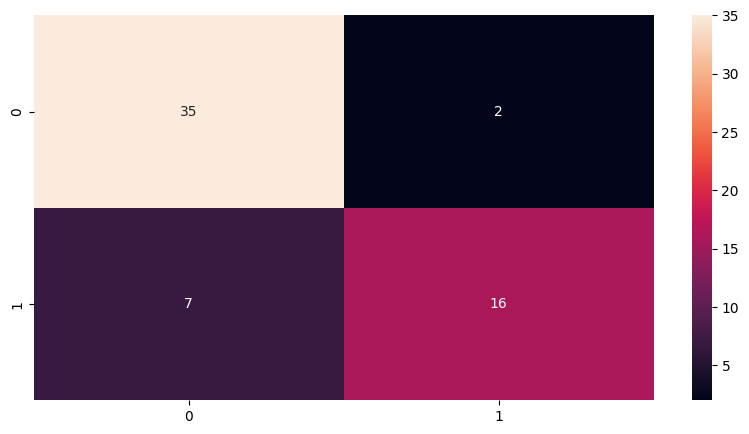

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm1 = confusion_matrix(y_test, y_unbalanced_pred)
sns.heatmap(cm1, annot=True, fmt = 'g')

Dari output di atas, dapat terlihat pada visualisasi Confusion Matrix untuk model unbalanced data menunjukan bahwa terdapat 35 + 16 = 51 diprediksi benar (sesuai) dan 2 + 7 = 9 diprediksi tidak benar (tidak sesuai).

Pada model unbalnaced data, dapat kita lihat bahwa terdapat

- True Positives (Actual Positive:1s and Predict Positive:1s) = 16
- True Negatives (Actual Negative:0s and Predict Negative:0s) = 35
- False Positives (Actual Negative:0s but Predict Positive:1s) = 7(Kesalahan tipe I)
- False Negatives (Actual Positive:1 but Predict Negative:0) = 2(Kesalahan tipe II)

### SMOTE

In [58]:
from sklearn.metrics import classification_report,accuracy_score

 # menggunakan y_test untuk mendapatkan hasil
print(classification_report(y_test, y_smote_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_smote_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.88      0.65      0.75        23

    accuracy                           0.83        60
   macro avg       0.85      0.80      0.81        60
weighted avg       0.84      0.83      0.83        60

Accuracy of the Model: 83.33333333333334 %


<AxesSubplot: >

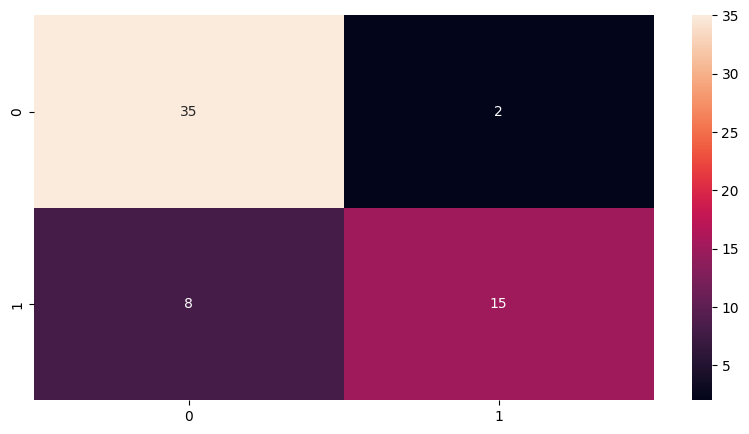

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm2 = confusion_matrix(y_test, y_smote_pred)
sns.heatmap(cm2, annot=True, fmt = 'g')

Dari output di atas, dapat kita ketahui bahwa pada visualisasi Confusion Matrix untuk model SMOTE menunjukan bahwa terdapat 36 + 17 = 53 diprediksi benar (sesuai) dan 1 + 6 = 7 diprediksi tidak benar (tidak sesuai).

Pada model SMOTE, dapat kita lihat bahwa terdapat

- True Positives (Actual Positive:1s and Predict Positive:1s) = 17
- True Negatives (Actual Negative:0s and Predict Negative:0s) = 36
- False Positives (Actual Negative:0s but Predict Positive:1s) = 6 (Kesalahan tipe I)
- False Negatives (Actual Positive:1 but Predict Negative:0) = 1 (Kesalahan tipe II)

### Borderline SMOTE

In [60]:
from sklearn.metrics import classification_report,accuracy_score

 # menggunakan y_test untuk mendapatkan hasil
print(classification_report(y_test, y_bsmote_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_bsmote_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        37
           1       0.83      0.65      0.73        23

    accuracy                           0.82        60
   macro avg       0.82      0.79      0.80        60
weighted avg       0.82      0.82      0.81        60

Accuracy of the Model: 81.66666666666667 %


<AxesSubplot: >

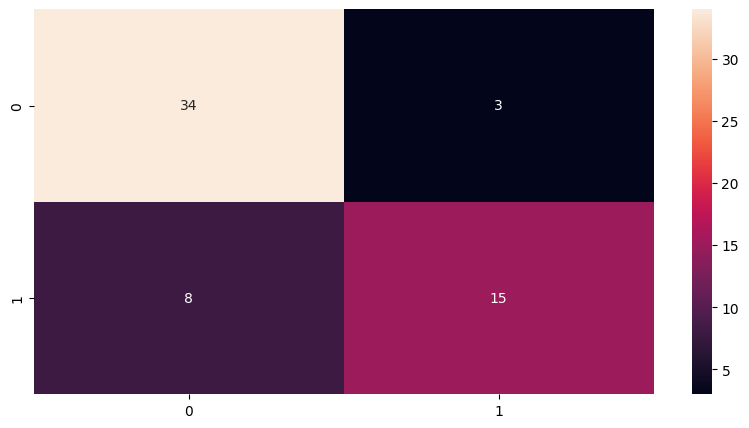

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm3 = confusion_matrix(y_test, y_bsmote_pred)
sns.heatmap(cm3, annot=True, fmt = 'g')

Pada visualisasi Confusion Matrix untuk model BSMOTE menunjukan bahwa terdapat 34 + 15 = 49 diprediksi benar (sesuai) dan 3 + 8 = 11 diprediksi tidak benar (tidak sesuai).

Pada model Borderline BSMOTE, dapat kita lihat bahwa terdapat

- True Positives (Actual Positive:1s and Predict Positive:1s) = 15
- True Negatives (Actual Negative:0s and Predict Negative:0s) = 34
- False Positives (Actual Negative:0s but Predict Positive:1s) = 8 (Kesalahan tipe I)
- False Negatives (Actual Positive:1 but Predict Negative:0) = 3 (Kesalahan tipe II)

### ADASYN

In [62]:
from sklearn.metrics import classification_report,accuracy_score

 # menggunakan y_test untuk mendapatkan hasil
print(classification_report(y_test, y_ada_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_ada_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60

Accuracy of the Model: 85.0 %


<AxesSubplot: >

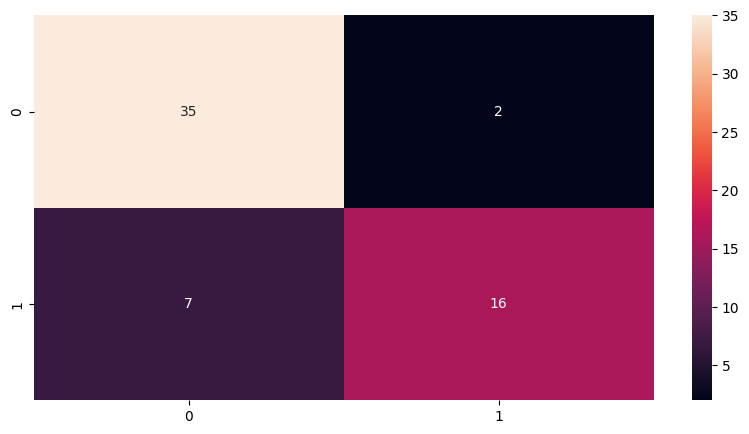

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm4 = confusion_matrix(y_test, y_ada_pred)
sns.heatmap(cm4, annot=True, fmt = 'g')

Pada visualisasi Confusion Matrix untuk model ADASYN menunjukan bahwa terdapat 34 + 17 = 51 diprediksi benar (sesuai) dan 3 + 6 = 9 diprediksi tidak benar (tidak sesuai).

Pada model Borderline ADASYN, dapat kita lihat bahwa terdapat

- True Positives (Actual Positive:1s and Predict Positive:1s) = 17
- True Negatives (Actual Negative:0s and Predict Negative:0s) = 34
- False Positives (Actual Negative:0s but Predict Positive:1s) = 6 (Kesalahan tipe I)
- False Negatives (Actual Positive:1 but Predict Negative:0) = 3 (Kesalahan tipe II)

### Comparison Ensamble Model

Pada bagian ini akan ditampilkan perbandingan nilai evaluasi (Akurasi, Recall, Precision) pada setiap model

In [64]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

hasil1 = [(accuracy_score(y_test, y_unbalanced_pred) * 100), (recall_score(y_test, y_unbalanced_pred,  pos_label=1) * 100), (precision_score(y_test, y_unbalanced_pred,  pos_label=1) * 100), (f1_score(y_test, y_unbalanced_pred,  pos_label=1) * 100)]
hasil2 = [(accuracy_score(y_test, y_smote_pred) * 100), (recall_score(y_test, y_smote_pred,  pos_label=1) * 100), (precision_score(y_test, y_smote_pred,  pos_label=1) * 100), (f1_score(y_test, y_smote_pred,  pos_label=1) * 100)]
hasil3 = [(accuracy_score(y_test, y_bsmote_pred) * 100), (recall_score(y_test, y_bsmote_pred,  pos_label=1) * 100), (precision_score(y_test, y_bsmote_pred,  pos_label=1) * 100), (f1_score(y_test, y_bsmote_pred,  pos_label=1) * 100)]
hasil4 = [(accuracy_score(y_test, y_ada_pred) * 100), (recall_score(y_test, y_ada_pred,  pos_label=1) * 100), (precision_score(y_test, y_ada_pred,  pos_label=1) * 100), (f1_score(y_test, y_ada_pred,  pos_label=1) * 100)]

dic = {'Unbalanced' : [str(round((hasil1[0]))) + '%', str(round((hasil1[1]))) + '%', str(round((hasil1[2]))) + '%', str(round((hasil1[3]))) + '%'], 
       'SMOTE' : [str(round((hasil2[0]))) + '%', str(round((hasil2[1]))) + '%', str(round((hasil2[2]))) + '%', str(round((hasil2[3]))) + '%'],
       'Borderline_SMOTE' : [str(round((hasil3[0]))) + '%', str(round((hasil3[1]))) + '%', str(round((hasil3[2]))) + '%', str(round((hasil3[3]))) + '%'],
       'ADASYN' : [str(round((hasil4[0]))) + '%', str(round((hasil4[1]))) + '%', str(round((hasil4[2]))) + '%', str(round((hasil4[3]))) + '%']}

df_hasil = pd.DataFrame(data = dic, index=['Accuracy', 'Recall', 'Precision', 'F1-Score'])
df_hasil

,Unbalanced,SMOTE,Borderline_SMOTE,ADASYN
Accuracy,85%,83%,82%,85%
Recall,70%,65%,65%,70%
Precision,89%,88%,83%,89%
F1-Score,78%,75%,73%,78%


## Kesimpulan

Note: Untuk nilai Accuracy, Recall, Precision, F1-Score akan terus berubah jika dilakukan run ulang

Setiap Nilai evaluasi pada bagian perbandingan model memiliki nilai yang hampir sama.

Untuk nilai akurasi berada di rentang nilai 85 - 88
Untuk nilai recall berada di rentang nilai 70 - 83
Untuk nilai Precision berada di rentang nilai 86 - 94
Untuk nilai F1-Score berada di rentang 78 - 84

Nilai evaluasi terutama untuk nilai akurasi tidak bisa mencapai nilai 95 persen yang merupakan nilai optimal untuk model klasifikasi, hal ini dikarenakan beberapa faktor :

- Kolerasi setiap kolom terhadap variabel dependen(Death Event) terlalu kecil, kolom atau variabel independen dengan nilai korelasi tertinggi dengan variabel dependen hanya berada direntang nilai 0.2
- Jumlah Dataset yang terlalu sedikit, yaitu hanya berjumlah 300 data, dan data tersebut nantinya akan dibagi ke dalam data training data testing